# 3.0 Downloading, cleaning and exploration of sentiment data

In [19]:
import pandas as pd

In [40]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd

# List of 20 stocks (add the stock symbols)
stock_symbols = [
    'AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO', 'WMT',
    'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG'
]


# Define columns for the DataFrame
columns = ['datetime', 'title', 'source', 'Link', 'top_sentiment', 'sentiment_score', 'stock_symbol']

# Create an empty DataFrame with the specified columns to store all stocks' data
all_stocks_df = pd.DataFrame(columns=columns)

# Loop through each stock symbol
for stock in stock_symbols:
    # Create an empty DataFrame for each stock
    stock_df = pd.DataFrame(columns=columns)
    counter = 0
    
    # Loop through the first 500 pages of news
    for page in range(1, 501):
        # Correct URL formatting and syntax
        url = f'https://markets.businessinsider.com/news/{stock}-stock?p={page}'
        
        # Send GET request to fetch the page
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, "lxml")
        
        # Find all article containers
        articles = soup.find_all('div', class_='latest-news__story')
        
        # Loop through each article
        for article in articles:
            # Extract article data
            date_time = article.find('time', class_='latest-news__date').get('datetime')  # Fixed quote issue
            title = article.find('a', class_='news-link').text.strip()  # Fixed class name and added strip
            source = article.find('span', class_='latest-news__source').text.strip()  # Fixed class name and added strip
            link = article.find('a', class_='news-link').get('href')
            
            # Sentiment analysis placeholders
            top_sentiment = ''  # You can integrate sentiment analysis here
            sentiment_score = 0  # Placeholder for sentiment score
            
            # Create a new row for this stock
            new_row = pd.DataFrame([[date_time, title, source, link, top_sentiment, sentiment_score, stock]], columns=columns)
            stock_df = pd.concat([stock_df, new_row], ignore_index=True)
            
            # Increment counter
            counter += 1
        
        # If no articles are found on the current page, exit the loop (no need to scrape further pages)
        if len(articles) == 0:
            print(f"No more articles for {stock} on page {page}")
            break

    # Append the stock's data to the main DataFrame for all stocks
    all_stocks_df = pd.concat([all_stocks_df, stock_df], ignore_index=True)
    print(f"Scraped {counter} articles for {stock}.")

# Save the combined DataFrame to a CSV file after scraping all stocks
all_stocks_df.to_csv('all_stocks_news.csv', index=False)
print("Scraping completed for all stocks. Data saved to 'all_stocks_news.csv'.")


No more articles for aapl on page 413
Scraped 20573 articles for aapl.
No more articles for amzn on page 441
Scraped 22000 articles for amzn.
No more articles for msft on page 270
Scraped 13406 articles for msft.
No more articles for googl on page 192
Scraped 9550 articles for googl.
No more articles for tsla on page 1
Scraped 0 articles for tsla.
No more articles for fb on page 1
Scraped 0 articles for fb.
No more articles for nvda on page 200
Scraped 9938 articles for nvda.
No more articles for dis on page 111
Scraped 5461 articles for dis.
No more articles for nflx on page 125
Scraped 6157 articles for nflx.
No more articles for intc on page 114
Scraped 5621 articles for intc.
No more articles for ba on page 228
Scraped 11325 articles for ba.
No more articles for v on page 58
Scraped 2837 articles for v.
No more articles for ma on page 47
Scraped 2272 articles for ma.
No more articles for goog on page 232
Scraped 11525 articles for goog.
No more articles for csco on page 49
Scraped 

In [60]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Updated list of valid stock symbols
remaining_stocks = [
    'AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO', 'WMT',
    'LLY', 'JPM', 'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG'
]

# Load the existing CSV data (if available) to check which stocks are already scraped
try:
    all_stocks_df = pd.read_csv('all_stocks_news.csv')
    # Extract the list of stock symbols already in the CSV
    existing_stocks = all_stocks_df['stock_symbol'].unique().tolist()
except FileNotFoundError:
    # If no CSV file exists, start fresh
    existing_stocks = []

# Identify the stocks that need scraping (those in remaining_stocks but not in existing_stocks)
stocks_to_scrape = [stock for stock in remaining_stocks if stock not in existing_stocks]

# Define columns for the DataFrame
columns = ['datetime', 'title', 'source', 'Link', 'top_sentiment', 'sentiment_score', 'stock_symbol']

# Create an empty DataFrame to store all stocks' data
all_stocks_df = pd.DataFrame(columns=columns)

# Loop through the stocks that need to be scraped
for stock in stocks_to_scrape:
    # Create an empty DataFrame for each stock
    stock_df = pd.DataFrame(columns=columns)
    counter = 0
    
    # Loop through the first 500 pages of news
    for page in range(1, 501):
        # Correct URL formatting and syntax
        url = f'https://markets.businessinsider.com/news/{stock}-stock?p={page}'
        
        # Send GET request to fetch the page
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, "lxml")
        
        # Find all article containers
        articles = soup.find_all('div', class_='latest-news__story')
        
        # Loop through each article
        for article in articles:
            # Extract article data
            date_time = article.find('time', class_='latest-news__date').get('datetime')
            title = article.find('a', class_='news-link').text.strip()
            source = article.find('span', class_='latest-news__source').text.strip()
            link = article.find('a', class_='news-link').get('href')
            
            # Sentiment analysis placeholders
            top_sentiment = ''  # You can integrate sentiment analysis here
            sentiment_score = 0  # Placeholder for sentiment score
            
            # Create a new row for this stock
            new_row = pd.DataFrame([[date_time, title, source, link, top_sentiment, sentiment_score, stock]], columns=columns)
            stock_df = pd.concat([stock_df, new_row], ignore_index=True)
            
            # Increment counter
            counter += 1
        
        # If no articles are found on the current page, exit the loop
        if len(articles) == 0:
            print(f"No more articles for {stock} on page {page}")
            break

    # Append the stock's data to the main DataFrame
    all_stocks_df = pd.concat([all_stocks_df, stock_df], ignore_index=True)
    print(f"Scraped {counter} articles for {stock}.")

# Save the combined DataFrame to a CSV file after scraping all the missing stocks
all_stocks_df.to_csv('all_stocks_news.csv', index=False)
print("Scraping completed for the remaining stocks. Data saved to 'all_stocks_news.csv'.")


No more articles for AAPL on page 413
Scraped 20573 articles for AAPL.
No more articles for NVDA on page 200
Scraped 9938 articles for NVDA.
No more articles for MSFT on page 270
Scraped 13406 articles for MSFT.
No more articles for AMZN on page 441
Scraped 22000 articles for AMZN.
No more articles for GOOGL on page 236
Scraped 11708 articles for GOOGL.
No more articles for GOOG on page 232
Scraped 11525 articles for GOOG.
No more articles for META on page 347
Scraped 17258 articles for META.
Scraped 25000 articles for TSLA.
No more articles for AVGO on page 42
Scraped 2011 articles for AVGO.
No more articles for WMT on page 141
Scraped 6999 articles for WMT.
No more articles for LLY on page 80
Scraped 3925 articles for LLY.
No more articles for JPM on page 142
Scraped 7006 articles for JPM.
No more articles for V on page 58
Scraped 2837 articles for V.
No more articles for UNH on page 40
Scraped 1936 articles for UNH.
No more articles for XOM on page 86
Scraped 4246 articles for XOM.


# Data cleaning of Sentiment data

In [317]:
sentimentdata = pd.read_csv('datasets/all_stocks_news.csv')

In [318]:
sentimentdata.head()

,datetime,title,source,Link,top_sentiment,sentiment_score,stock_symbol
0,11/29/2024 6:05:21 PM,"Trump Weekly: Autos, retail, restaurant sector...",TipRanks,/news/stocks/trump-weekly-autos-retail-restaur...,NaN,0,AAPL
1,11/29/2024 4:30:21 PM,Trump weighs tough antitrust enforcer for DOJ ...,TipRanks,/news/stocks/trump-weighs-tough-antitrust-enfo...,NaN,0,AAPL
2,11/29/2024 1:20:14 PM,Wedbush sees Black Friday kicking off ‘importa...,TipRanks,/news/stocks/wedbush-sees-black-friday-kicking...,NaN,0,AAPL
3,11/29/2024 1:15:08 PM,Apple (AAPL): New Buy Recommendation for This ...,TipRanks,/news/stocks/apple-aapl-new-buy-recommendation...,NaN,0,AAPL
4,11/29/2024 7:05:17 AM,UBS Keeps Their Hold Rating on Apple (AAPL),TipRanks,/news/stocks/ubs-keeps-their-hold-rating-on-ap...,NaN,0,AAPL


In [319]:
# Check for missing values
print(sentimentdata.isnull().sum())

# Example: Handle missing values in 'top_sentiment' column
# data['top_sentiment'].fillna('Neutral', inplace=True)  # Replace NaN with 'Neutral'


datetime                0
title                   0
source                  0
Link                    0
top_sentiment      171764
sentiment_score         0
stock_symbol            0
dtype: int64


In [320]:
# Drop the 'sentiment_score' column from merged_dataframe
sentimentdata = sentimentdata.drop(columns=['sentiment_score', 'top_sentiment'])

In [321]:
# Ensure the 'datetime' column is converted to a uniform format
sentimentdata['datetime'] = pd.to_datetime(sentimentdata['datetime'])

# Format the 'datetime' column to the desired "YYYY-MM-DD" format
sentimentdata['datetime'] = sentimentdata['datetime'].dt.strftime('%Y-%m-%d')

# Display the updated DataFrame
print(sentimentdata.head())


C:\Users\USER\AppData\Local\Temp\ipykernel_31404\3250544955.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentimentdata['datetime'] = pd.to_datetime(sentimentdata['datetime'])


     datetime                                              title    source  \
0  2024-11-29  Trump Weekly: Autos, retail, restaurant sector...  TipRanks   
1  2024-11-29  Trump weighs tough antitrust enforcer for DOJ ...  TipRanks   
2  2024-11-29  Wedbush sees Black Friday kicking off ‘importa...  TipRanks   
3  2024-11-29  Apple (AAPL): New Buy Recommendation for This ...  TipRanks   
4  2024-11-29        UBS Keeps Their Hold Rating on Apple (AAPL)  TipRanks   

                                                Link stock_symbol  
0  /news/stocks/trump-weekly-autos-retail-restaur...         AAPL  
1  /news/stocks/trump-weighs-tough-antitrust-enfo...         AAPL  
2  /news/stocks/wedbush-sees-black-friday-kicking...         AAPL  
3  /news/stocks/apple-aapl-new-buy-recommendation...         AAPL  
4  /news/stocks/ubs-keeps-their-hold-rating-on-ap...         AAPL  


In [322]:
# Check the data type of the 'datetime' column
print(sentimentdata['datetime'].dtype)


object


In [323]:
# Convert 'datetime' column to datetime format
sentimentdata['datetime'] = pd.to_datetime(sentimentdata['datetime'])

# Format the 'datetime' column to "YYYY-MM-DD"
sentimentdata['datetime'] = sentimentdata['datetime'].dt.strftime('%Y-%m-%d')

# Verify the change
print(sentimentdata.head())

     datetime                                              title    source  \
0  2024-11-29  Trump Weekly: Autos, retail, restaurant sector...  TipRanks   
1  2024-11-29  Trump weighs tough antitrust enforcer for DOJ ...  TipRanks   
2  2024-11-29  Wedbush sees Black Friday kicking off ‘importa...  TipRanks   
3  2024-11-29  Apple (AAPL): New Buy Recommendation for This ...  TipRanks   
4  2024-11-29        UBS Keeps Their Hold Rating on Apple (AAPL)  TipRanks   

                                                Link stock_symbol  
0  /news/stocks/trump-weekly-autos-retail-restaur...         AAPL  
1  /news/stocks/trump-weighs-tough-antitrust-enfo...         AAPL  
2  /news/stocks/wedbush-sees-black-friday-kicking...         AAPL  
3  /news/stocks/apple-aapl-new-buy-recommendation...         AAPL  
4  /news/stocks/ubs-keeps-their-hold-rating-on-ap...         AAPL  


In [324]:
sentimentdata['datetime'] = pd.to_datetime(sentimentdata['datetime'])


In [325]:
print(sentimentdata.dtypes)

datetime        datetime64[ns]
title                   object
source                  object
Link                    object
stock_symbol            object
dtype: object


In [326]:
import pandas as pd

# Generate the datetime range from 2013-01-01 to 2023-12-31
date_range = pd.date_range(start='2013-01-01', end='2023-12-31')

# Create the DataFrame with empty columns
new_dataframe = pd.DataFrame({
    'datetime': date_range,
    'title': None,
    'source': None,
    'Link': None,
    'stock_symbol': None
})

# Display the first few rows of the new DataFrame
print(new_dataframe.head())

# Display the last few rows of the new DataFrame
print(new_dataframe.tail())


    datetime title source  Link stock_symbol
0 2013-01-01  None   None  None         None
1 2013-01-02  None   None  None         None
2 2013-01-03  None   None  None         None
3 2013-01-04  None   None  None         None
4 2013-01-05  None   None  None         None
       datetime title source  Link stock_symbol
4012 2023-12-27  None   None  None         None
4013 2023-12-28  None   None  None         None
4014 2023-12-29  None   None  None         None
4015 2023-12-30  None   None  None         None
4016 2023-12-31  None   None  None         None


In [327]:
# Set 'datetime' as the index for both DataFrames
sentimentdata.set_index('datetime', inplace=True)
new_dataframe.set_index('datetime', inplace=True)

# Merge the two DataFrames
merged_dataframe = new_dataframe.combine_first(sentimentdata)

# Reset the index if needed
merged_dataframe.reset_index(inplace=True)

# Display the merged DataFrame
print(merged_dataframe.head())


    datetime                                              title       source  \
0 2005-02-09  Neal J. Keating Named Chief Operating Officer ...  PR Newswire   
1 2005-02-24  Amantea Announces Groundbreaking for New Minor...  PR Newswire   
2 2005-05-16  Freddie Mac, Chase, Nonprofits Launch Philadel...  PR Newswire   
3 2005-05-21  JPMorgan Partners and Bancroft Private Equity ...  PR Newswire   
4 2005-06-02  Wal-Mart and SAM'S CLUB to Give $6.9 Million i...  PR Newswire   

                                                Link stock_symbol  
0  /news/stocks/neal-j-keating-named-chief-operat...           HD  
1  /news/stocks/amantea-announces-groundbreaking-...           PG  
2  /news/stocks/freddie-mac-chase-nonprofits-laun...          JPM  
3  /news/stocks/jpmorgan-partners-and-bancroft-pr...          JPM  
4  /news/stocks/wal-mart-and-sams-club-to-give-$6...          WMT  


In [328]:
# # Display the merged DataFrame
# sentimentdata['datetime'] = pd.to_datetime(sentimentdata['datetime'])
# print(merged_dataframe.head())

In [329]:
# ALLOW ONLY SENTIMENT DATA BETWEEN 2013-01-01 AND 2023-12-31

# Ensure the 'datetime' column is in datetime format
merged_dataframe['datetime'] = pd.to_datetime(merged_dataframe['datetime'])

# Define the date range
start_date = "2013-01-01"
end_date = "2023-12-31"

# Filter the DataFrame for the desired date range
filtered_data = merged_dataframe[
    (merged_dataframe['datetime'] >= start_date) & 
    (merged_dataframe['datetime'] <= end_date)
]

# Check the resulting DataFrame
print(filtered_data)


         datetime                                              title  \
695    2013-01-01                                                NaN   
696    2013-01-02  Judge rejects part of Apple App Store suit vs ...   
697    2013-01-02            Apple testing new iPhone, iOS 7: report   
698    2013-01-02  Judge rejects part of Apple App Store suit vs ...   
699    2013-01-03            Microsoft acquires start-up id8: source   
...           ...                                                ...   
145568 2023-12-31  The Countdown Begins: Scott Devitt Picks His 3...   
145569 2023-12-31  3 Growth Stocks Set to Outperform the Nasdaq i...   
145570 2023-12-31  3 Growth Stocks Set to Outperform the Nasdaq i...   
145571 2023-12-31  The Countdown Begins: Scott Devitt Picks His 3...   
145572 2023-12-31  Trillion-Dollar Titans: Top 3 Stocks to Grab B...   

               source                                               Link  \
695               NaN                                      

In [330]:
# Check for missing values
print(filtered_data.isnull().sum())

datetime          0
title           410
source          410
Link            410
stock_symbol    410
dtype: int64


In [331]:
# Drop unnecessary columns
filtered_data = filtered_data.drop(columns=['source', 'Link'])

# Fill null values in the 'title' column with a placeholder or appropriate handling
filtered_data['title'] = filtered_data['title'].fillna('No Title Available')

# Fill null values in the 'stock_symbol' column using forward fill, backfill, or a default value
filtered_data['stock_symbol'] = filtered_data['stock_symbol'].fillna(method='ffill')

# Alternatively, you could use backfill or a placeholder value:
# filtered_data['stock_symbol'] = filtered_data['stock_symbol'].fillna(method='bfill')
# filtered_data['stock_symbol'] = filtered_data['stock_symbol'].fillna('UNKNOWN')

# Reset index
filtered_data = filtered_data.reset_index(drop=True)

# Check the cleaned DataFrame
print(filtered_data.head())
print(filtered_data.isnull().sum())  # Confirm remaining null values, if any


    datetime                                              title stock_symbol
0 2013-01-01                                 No Title Available          NaN
1 2013-01-02  Judge rejects part of Apple App Store suit vs ...         AAPL
2 2013-01-02            Apple testing new iPhone, iOS 7: report         AAPL
3 2013-01-02  Judge rejects part of Apple App Store suit vs ...         AMZN
4 2013-01-03            Microsoft acquires start-up id8: source         MSFT
datetime        0
title           0
stock_symbol    1
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_31404\447752071.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data['stock_symbol'] = filtered_data['stock_symbol'].fillna(method='ffill')


In [332]:
filtered_data['stock_symbol'].fillna('AAPL', inplace=True)
filtered_data.isnull().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_31404\977499077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data['stock_symbol'].fillna('AAPL', inplace=True)


datetime        0
title           0
stock_symbol    0
dtype: int64

In [333]:
# # Check for missing values
# print(merged_dataframe.isnull().sum())

In [334]:
# Filter out rows with dates from 2024-01-01 onward
filtered_data = filtered_data[filtered_data['datetime'] < '2024-01-01']

# Display the updated DataFrame
print(filtered_data)

         datetime                                              title  \
0      2013-01-01                                 No Title Available   
1      2013-01-02  Judge rejects part of Apple App Store suit vs ...   
2      2013-01-02            Apple testing new iPhone, iOS 7: report   
3      2013-01-02  Judge rejects part of Apple App Store suit vs ...   
4      2013-01-03            Microsoft acquires start-up id8: source   
...           ...                                                ...   
144873 2023-12-31  The Countdown Begins: Scott Devitt Picks His 3...   
144874 2023-12-31  3 Growth Stocks Set to Outperform the Nasdaq i...   
144875 2023-12-31  3 Growth Stocks Set to Outperform the Nasdaq i...   
144876 2023-12-31  The Countdown Begins: Scott Devitt Picks His 3...   
144877 2023-12-31  Trillion-Dollar Titans: Top 3 Stocks to Grab B...   

       stock_symbol  
0              AAPL  
1              AAPL  
2              AAPL  
3              AMZN  
4              MSFT  
...

In [335]:
filtered_data

,datetime,title,stock_symbol
0,2013-01-01,No Title Available,AAPL
1,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AAPL
2,2013-01-02,"Apple testing new iPhone, iOS 7: report",AAPL
3,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AMZN
4,2013-01-03,Microsoft acquires start-up id8: source,MSFT
...,...,...,...
144873,2023-12-31,The Countdown Begins: Scott Devitt Picks His 3...,AMZN
144874,2023-12-31,3 Growth Stocks Set to Outperform the Nasdaq i...,GOOGL
144875,2023-12-31,3 Growth Stocks Set to Outperform the Nasdaq i...,GOOG
144876,2023-12-31,The Countdown Begins: Scott Devitt Picks His 3...,META


In [336]:
sentiment_df_cleaned = filtered_data

In [337]:
# Save the Close Price datase
sentiment_df_cleaned.to_csv('datasets/sentiment_rawcleaned_file.csv', index=False)


# Data visualisation of cleaned sentiment data

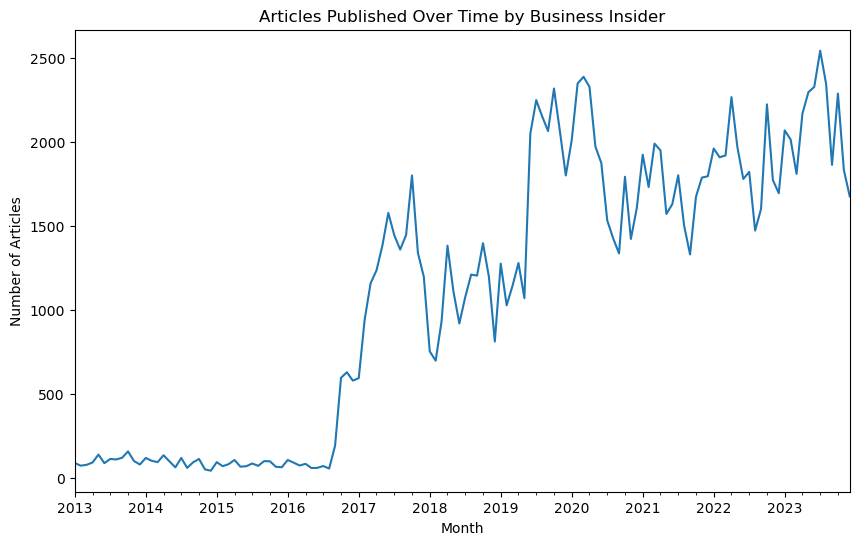

In [339]:
import matplotlib.pyplot as plt

# Count articles per month
articles_per_month = filtered_data['datetime'].dt.to_period('M').value_counts().sort_index()

# Plot
articles_per_month.plot(kind='line', figsize=(10, 6), title="Articles Published Over Time by Business Insider")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.show()


In [340]:
# import matplotlib.pyplot as plt
# # Filter for a specific stock
# stock_data = merged_dataframe[merged_dataframe['stock_symbol'] == 'AAPL']

# # Count articles per month
# stock_monthly = stock_data['datetime'].dt.to_period('M').value_counts().sort_index()

# # Plot
# stock_monthly.plot(kind='line', figsize=(10, 5))
# plt.title("Monthly Article Trends for AAPL")
# plt.xlabel("Month")
# plt.ylabel("Count")
# plt.show()

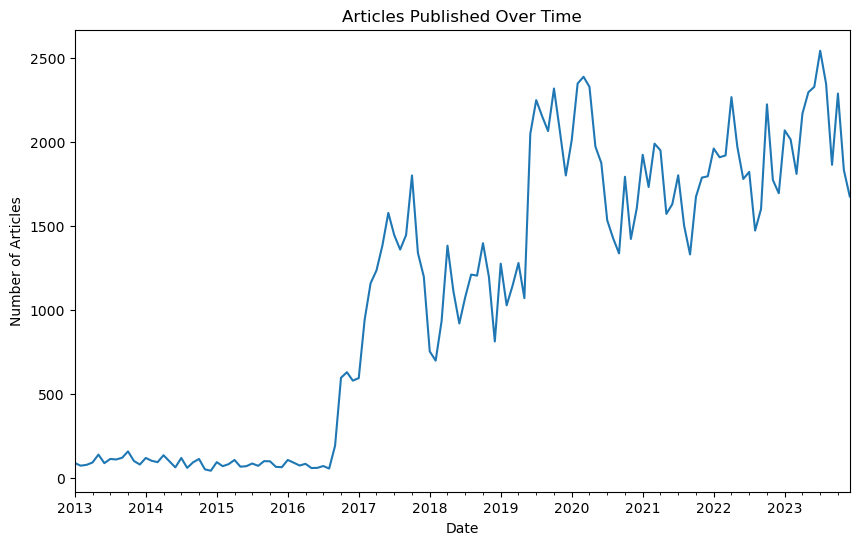

In [341]:
import matplotlib.pyplot as plt

filtered_data['datetime'] = pd.to_datetime(filtered_data['datetime'])
articles_per_month = filtered_data['datetime'].dt.to_period('M').value_counts().sort_index()
articles_per_month.plot(kind='line', figsize=(10, 6), title="Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


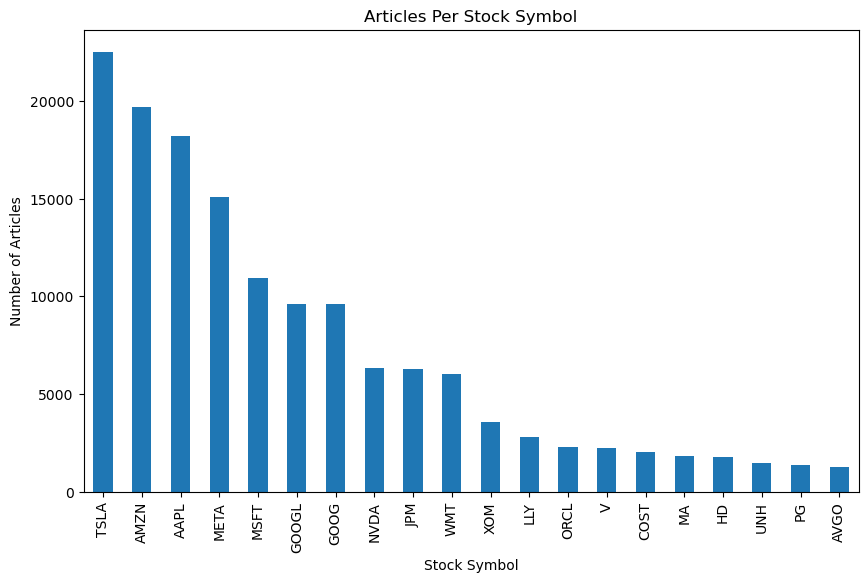

In [342]:
stock_counts = filtered_data['stock_symbol'].value_counts()
stock_counts.plot(kind='bar', figsize=(10, 6), title="Articles Per Stock Symbol")
plt.xlabel("Stock Symbol")
plt.ylabel("Number of Articles")
plt.show()

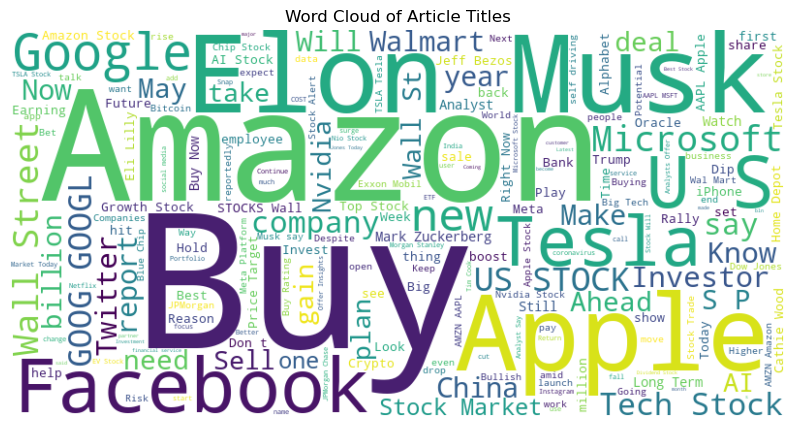

In [343]:
!pip install wordcloud
from wordcloud import WordCloud

all_titles = " ".join(filtered_data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Article Titles")
plt.show()


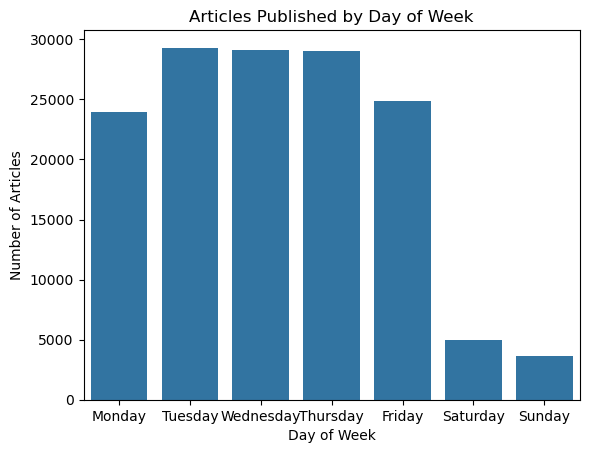

In [344]:
import seaborn as sns
filtered_data['day_of_week'] = filtered_data['datetime'].dt.day_name()
weekday_counts = filtered_data['day_of_week'].value_counts()
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Articles Published by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Articles")
plt.show()


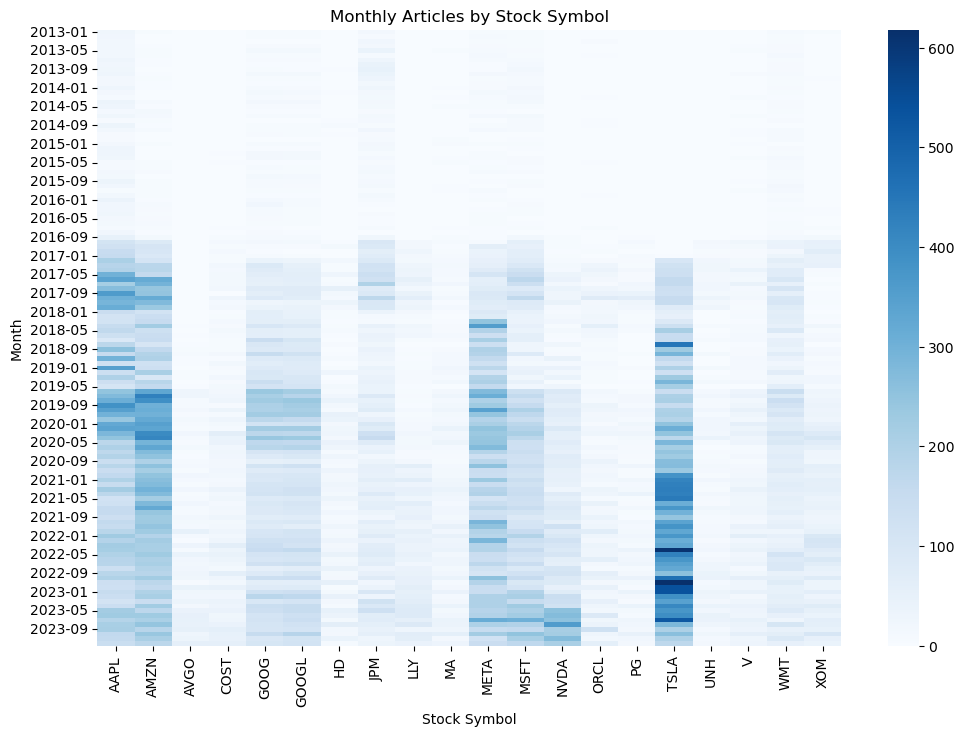

In [345]:
heatmap_data = filtered_data.groupby([filtered_data['datetime'].dt.to_period('M'), 'stock_symbol']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', cbar=True)
plt.title("Monthly Articles by Stock Symbol")
plt.xlabel("Stock Symbol")
plt.ylabel("Month")
plt.show()


In [346]:
filtered_data

,datetime,title,stock_symbol,day_of_week
0,2013-01-01,No Title Available,AAPL,Tuesday
1,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AAPL,Wednesday
2,2013-01-02,"Apple testing new iPhone, iOS 7: report",AAPL,Wednesday
3,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AMZN,Wednesday
4,2013-01-03,Microsoft acquires start-up id8: source,MSFT,Thursday
...,...,...,...,...
144873,2023-12-31,The Countdown Begins: Scott Devitt Picks His 3...,AMZN,Sunday
144874,2023-12-31,3 Growth Stocks Set to Outperform the Nasdaq i...,GOOGL,Sunday
144875,2023-12-31,3 Growth Stocks Set to Outperform the Nasdaq i...,GOOG,Sunday
144876,2023-12-31,The Countdown Begins: Scott Devitt Picks His 3...,META,Sunday


In [366]:
sentiment_df_cleaned.head()

,datetime,title,stock_symbol,day_of_week
0,2013-01-01,No Title Available,AAPL,Tuesday
1,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AAPL,Wednesday
2,2013-01-02,"Apple testing new iPhone, iOS 7: report",AAPL,Wednesday
3,2013-01-02,Judge rejects part of Apple App Store suit vs ...,AMZN,Wednesday
4,2013-01-03,Microsoft acquires start-up id8: source,MSFT,Thursday
